In [1]:
import yfinance as yf
import time
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
tick = ['ZEC-USD']
start_date = datetime(2023, 10, 1).strftime('%Y-%m-%d')
end_date = datetime(2024, 10, 1).strftime('%Y-%m-%d')

In [3]:
df = yf.download(tick, start= start_date , end = end_date )[['Close']]

[*********************100%***********************]  1 of 1 completed

YF.download() has changed argument auto_adjust default to True


In [4]:
df.isnull().sum()

Price  Ticker 
Close  ZEC-USD    0
dtype: int64

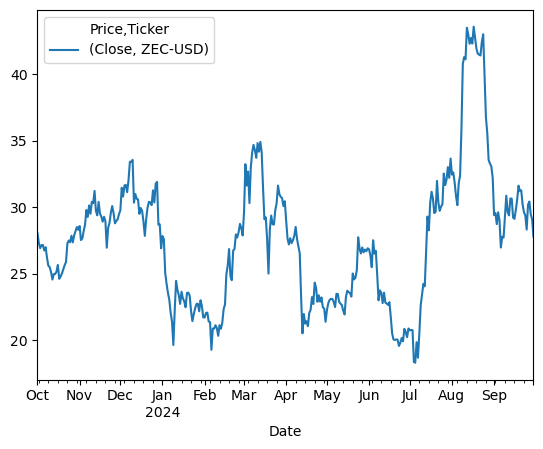

In [5]:
#first visualise data 
df.plot()
plt.show()

In [6]:
df['Y'] = df['Close'].shift(-1)
df

Price,Close,Y
Ticker,ZEC-USD,
Date,,
2023-10-01,28.063318,27.304394
2023-10-02,27.304394,26.915659
2023-10-03,26.915659,27.146259
2023-10-04,27.146259,27.155380
2023-10-05,27.155380,26.741430
...,...,...
2024-09-26,30.190125,30.426661
2024-09-27,30.426661,29.454737


In [7]:
df.dropna(inplace=True)
df

Price,Close,Y
Ticker,ZEC-USD,
Date,,
2023-10-01,28.063318,27.304394
2023-10-02,27.304394,26.915659
2023-10-03,26.915659,27.146259
2023-10-04,27.146259,27.155380
2023-10-05,27.155380,26.741430
...,...,...
2024-09-25,28.316616,30.190125
2024-09-26,30.190125,30.426661


In [8]:
X = df[['Close']]
y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [9]:
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [10]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Absolute Error: 1.3959300066973712
Mean Squared Error: 3.4725233861652276
R2 Score: 0.4682552801749701


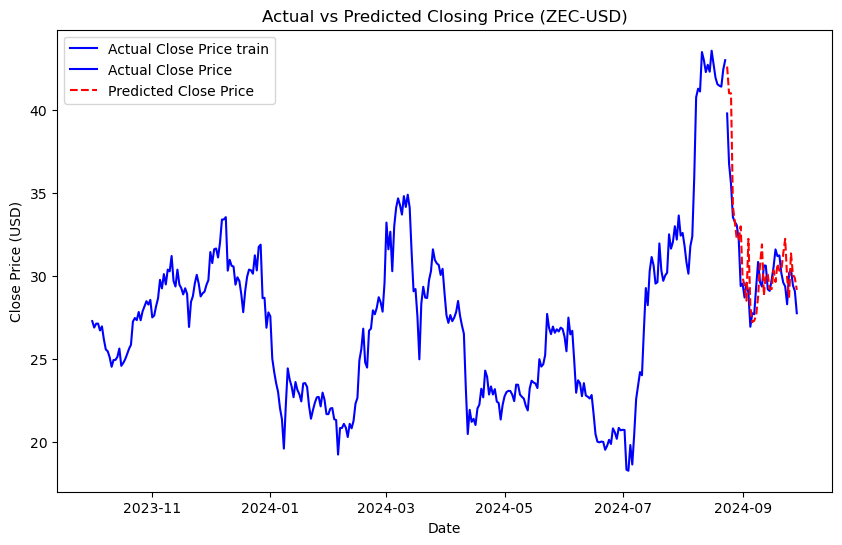

In [11]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_train.index, y_train, label='Actual Close Price train', color='blue')
plt.plot(y_test.index, y_test, label='Actual Close Price', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Close Price', color='red', linestyle='--')
plt.title('Actual vs Predicted Closing Price (ZEC-USD)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

forecast 

In [12]:
df1 = df['Close']

In [13]:
pred = [] 
current = df.iloc[-1]['Close'].values

for i in range (100):
    pred. append( model.predict(current))
    print (model.predict(current),current)
    current = model.predict(current)
    new_row = pd.Series(current, name=pd.to_datetime(df.index[-1]) + pd.Timedelta(days=i+1))
    df1 = pd.concat([df1, new_row.to_frame().T])
df1

[29.183529] [29.10489273]
[29.237112] [29.183529]
[28.76746] [29.237112]
[28.533928] [28.76746]
[28.308899] [28.533928]
[28.706734] [28.308899]
[28.983076] [28.706734]
[28.540846] [28.983076]
[28.308899] [28.540846]
[28.706734] [28.308899]
[28.983076] [28.706734]
[28.540846] [28.983076]
[28.308899] [28.540846]
[28.706734] [28.308899]
[28.983076] [28.706734]
[28.540846] [28.983076]
[28.308899] [28.540846]
[28.706734] [28.308899]
[28.983076] [28.706734]
[28.540846] [28.983076]
[28.308899] [28.540846]
[28.706734] [28.308899]
[28.983076] [28.706734]
[28.540846] [28.983076]
[28.308899] [28.540846]
[28.706734] [28.308899]
[28.983076] [28.706734]
[28.540846] [28.983076]
[28.308899] [28.540846]
[28.706734] [28.308899]
[28.983076] [28.706734]
[28.540846] [28.983076]
[28.308899] [28.540846]
[28.706734] [28.308899]
[28.983076] [28.706734]
[28.540846] [28.983076]
[28.308899] [28.540846]
[28.706734] [28.308899]
[28.983076] [28.706734]
[28.540846] [28.983076]
[28.308899] [28.540846]
[28.706734] [28.

,ZEC-USD,0
2023-10-01,28.063318,NaN
2023-10-02,27.304394,NaN
2023-10-03,26.915659,NaN
2023-10-04,27.146259,NaN
2023-10-05,27.155380,NaN
...,...,...
2025-01-03,NaN,28.540846
2025-01-04,NaN,28.308899
2025-01-05,NaN,28.706734
2025-01-06,NaN,28.983076


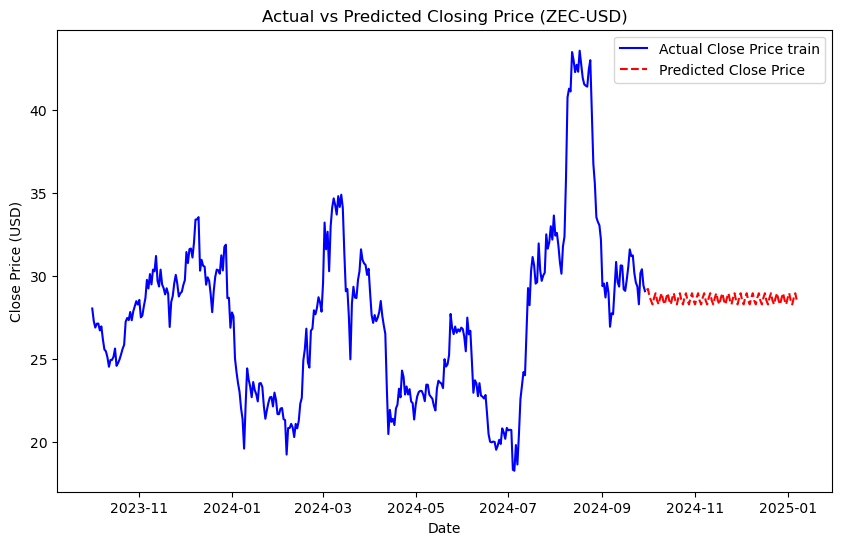

In [14]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Actual Close Price train', color='blue')
plt.plot(df1.index, df1[0], label='Predicted Close Price', color='red', linestyle='--')
plt.title('Actual vs Predicted Closing Price (ZEC-USD)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

In [15]:
df['5-Day MA'] = df['Close'].rolling(window=5).mean()
df['10-Day MA'] = df['Close'].rolling(window=10).mean()

In [16]:
df

Price,Close,Y,5-Day MA,10-Day MA
Ticker,ZEC-USD,,,
Date,,,,
2023-10-01,28.063318,27.304394,NaN,NaN
2023-10-02,27.304394,26.915659,NaN,NaN
2023-10-03,26.915659,27.146259,NaN,NaN
2023-10-04,27.146259,27.155380,NaN,NaN
2023-10-05,27.155380,26.741430,27.317002,NaN
...,...,...,...,...
2024-09-25,28.316616,30.190125,29.759619,30.110973
2024-09-26,30.190125,30.426661,29.544990,30.217507


In [17]:
df['Pct Change'] = df['Close'].pct_change()

In [18]:
df

Price,Close,Y,5-Day MA,10-Day MA,Pct Change
Ticker,ZEC-USD,,,,
Date,,,,,
2023-10-01,28.063318,27.304394,NaN,NaN,NaN
2023-10-02,27.304394,26.915659,NaN,NaN,-0.027043
2023-10-03,26.915659,27.146259,NaN,NaN,-0.014237
2023-10-04,27.146259,27.155380,NaN,NaN,0.008568
2023-10-05,27.155380,26.741430,27.317002,NaN,0.000336
...,...,...,...,...,...
2024-09-25,28.316616,30.190125,29.759619,30.110973,-0.036498
2024-09-26,30.190125,30.426661,29.544990,30.217507,0.066163


In [19]:
df['Prev Close'] = df['Close'].shift(1)
df['Prev 5-Day MA'] = df['5-Day MA'].shift(1)
df['Prev 10-Day MA'] = df['10-Day MA'].shift(1)
df['Prev Pct Change'] = df['Pct Change'].shift(1)

df.dropna(inplace=True)
df

Price,Close,Y,5-Day MA,10-Day MA,Pct Change,Prev Close,Prev 5-Day MA,Prev 10-Day MA,Prev Pct Change
Ticker,ZEC-USD,,,,,,,,
Date,,,,,,,,,
2023-10-11,25.120657,24.553568,25.878502,26.465563,-0.014265,25.484182,26.202657,26.759830,-0.004377
2023-10-12,24.553568,24.962584,25.391799,26.190481,-0.022575,25.120657,25.878502,26.465563,-0.014265
2023-10-13,24.962584,24.967636,25.143444,25.995173,0.016658,24.553568,25.391799,26.190481,-0.022575
2023-10-14,24.967636,25.153524,25.017725,25.777311,0.000202,24.962584,25.143444,25.995173,0.016658
2023-10-15,25.153524,25.652090,24.951594,25.577125,0.007445,24.967636,25.017725,25.777311,0.000202
...,...,...,...,...,...,...,...,...,...
2024-09-25,28.316616,30.190125,29.759619,30.110973,-0.036498,29.389256,30.339622,30.201204,-0.007899
2024-09-26,30.190125,30.426661,29.544990,30.217507,0.066163,28.316616,29.759619,30.110973,-0.036498


In [20]:
X = df[['Prev Close', 'Prev 5-Day MA', 'Prev 10-Day MA', 'Prev Pct Change']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [21]:
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [22]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Absolute Error: 1.4566721386379666
Mean Squared Error: 3.81367041892271
R2 Score: 0.4123836159706116


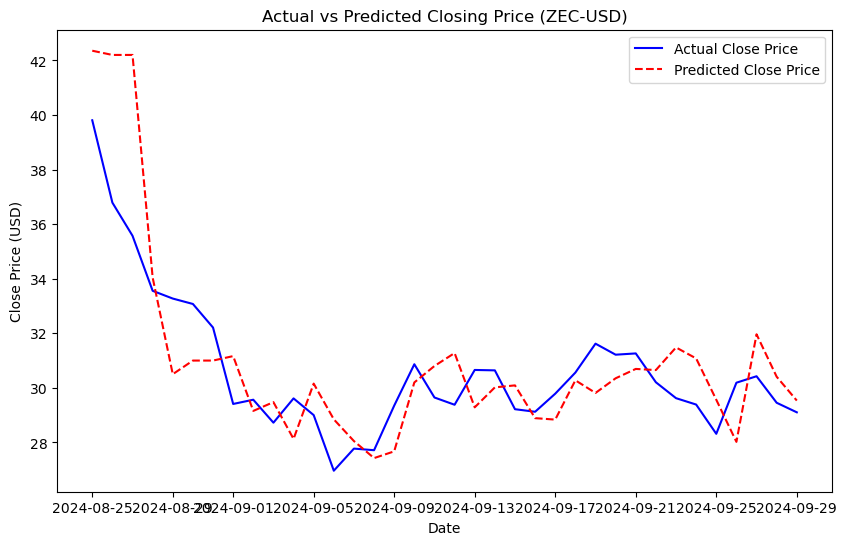

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Close Price', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Close Price', color='red', linestyle='--')
plt.title('Actual vs Predicted Closing Price (ZEC-USD)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

In [24]:
df.iloc[354,5:]

Price            Ticker
Prev Close                 29.454737
Prev 5-Day MA              29.555479
Prev 10-Day MA             30.170725
Prev Pct Change            -0.031943
Name: 2024-09-29 00:00:00, dtype: float64

In [26]:
predicted_close = model.predict(df.iloc[354,5:].values.reshape(1, -1))

In [27]:
row_index = 354
print(f"Predicted Close Price for row {row_index }: {predicted_close[0]}")

Predicted Close Price for row 354: 29.53496742248535


In [28]:
actual_close = df.iloc[row_index]['Close']

# Print the actual close price
print(f"Actual Close Price for row {row_index}: {actual_close}")

# Calculate the difference between actual and predicted price
price_diff = actual_close - predicted_close[0]
print(f"Difference between actual and predicted: {price_diff}")

Actual Close Price for row 354: Ticker
ZEC-USD    29.104893
Name: 2024-09-29 00:00:00, dtype: float64
Difference between actual and predicted: Ticker
ZEC-USD   -0.430075
Name: 2024-09-29 00:00:00, dtype: float64


In [29]:
last_row = df.iloc[-1]

In [30]:
df.iloc[-10:,0].values.tolist() 

[31.216630935668945,
 31.263269424438477,
 30.205713272094727,
 29.623241424560547,
 29.38925552368164,
 28.31661605834961,
 30.19012451171875,
 30.426660537719727,
 29.454736709594727,
 29.10489273071289]

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize a list to store the predicted values
predictions = []

# Get the last row of the dataset (most recent data point)
last_row = df.iloc[-1]

# Set the current row to the last row (starting point)
current_row = last_row

# Initialize a list to track the most recent closing prices (including predictions)
closing_prices = df.iloc[-10:,0].values.tolist()  # Ensuring it is a list of numbers

# Predict the next 7 days
for i in range(25):
    # Prepare the input data for the model
    input_data = current_row[['Prev Close', 'Prev 5-Day MA', 'Prev 10-Day MA', 'Prev Pct Change']].values.reshape(1, -1)

    # Make the prediction for the next day's closing price
    predicted_close = model.predict(input_data)

    # Store the prediction
    predictions.append(predicted_close[0])

    # Add the predicted close price to the list of closing prices
    closing_prices.append(predicted_close[0])  # Append the scalar predicted value

    # Ensure closing_prices[-5:] and closing_prices[-10:] are lists of numbers
    # Calculate the new 5-day and 10-day moving averages based on the most recent closing prices
    prev_5_day_ma = sum(closing_prices[-5:]) / 5  # Calculate 5-day MA (last 5 closing prices)
    prev_10_day_ma = sum(closing_prices[-10:]) / 10  # Calculate 10-day MA (last 10 closing prices)

    # Calculate the percentage change based on the previous day's actual or predicted close
    prev_pct_change = (predicted_close[0] - closing_prices[-2]) / closing_prices[-2] if len(closing_prices) > 1 else 0

    # Update the current row with the new features for the next day
    current_row['Prev Close'] = predicted_close[0]
    current_row['Prev 5-Day MA'] = prev_5_day_ma
    current_row['Prev 10-Day MA'] = prev_10_day_ma
    current_row['Prev Pct Change'] = prev_pct_change

    # Create a new row with the predicted data
    new_row = pd.Series(current_row, name=pd.to_datetime(df.index[-1]) + pd.Timedelta(days=1))
    
    # Concatenate the new row to the DataFrame
    df = pd.concat([df, new_row.to_frame().T])

# Create a list of future dates (for plotting)
forecast_dates = pd.date_range(df.index[-25], periods=26, freq='D')[1:]

# Plot the results



C:\Users\asus\AppData\Local\Temp\ipykernel_19680\1794559348.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_row['Prev Close'] = predicted_close[0]
C:\Users\asus\AppData\Local\Temp\ipykernel_19680\1794559348.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_row['Prev 5-Day MA'] = prev_5_day_ma
C:\Users\asus\AppData\Local\Temp\ipykernel_19680\1794559348.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_

In [32]:
df.tail(20)

Price,Close,Y,5-Day MA,10-Day MA,Pct Change,Prev Close,Prev 5-Day MA,Prev 10-Day MA,Prev Pct Change
Ticker,ZEC-USD,,,,,,,,
2024-10-05,29.104893,27.777708,29.498606,29.919114,-0.011877,31.286451,30.693429,30.217853,0.031469
2024-10-06,29.104893,27.777708,29.498606,29.919114,-0.011877,30.209030,30.793236,30.219743,-0.034437
2024-10-07,29.104893,27.777708,29.498606,29.919114,-0.011877,31.484125,30.809362,30.325490,0.042209
2024-10-08,29.104893,27.777708,29.498606,29.919114,-0.011877,30.334705,30.729250,30.413486,-0.036508
2024-10-09,29.104893,27.777708,29.498606,29.919114,-0.011877,31.280308,30.918924,30.631028,0.031172
2024-10-10,29.104893,27.777708,29.498606,29.919114,-0.011877,30.249048,30.711443,30.702436,-0.032968
2024-10-11,29.104893,27.777708,29.498606,29.919114,-0.011877,31.522289,30.974095,30.883665,0.042092
2024-10-12,29.104893,27.777708,29.498606,29.919114,-0.011877,30.208164,30.718903,30.764132,-0.041689
2024-10-13,29.104893,27.777708,29.498606,29.919114,-0.011877,31.445911,30.941144,30.835197,0.040974


In [33]:
forecast_dates

DatetimeIndex(['2024-10-01', '2024-10-02', '2024-10-03', '2024-10-04',
               '2024-10-05', '2024-10-06', '2024-10-07', '2024-10-08',
               '2024-10-09', '2024-10-10', '2024-10-11', '2024-10-12',
               '2024-10-13', '2024-10-14', '2024-10-15', '2024-10-16',
               '2024-10-17', '2024-10-18', '2024-10-19', '2024-10-20',
               '2024-10-21', '2024-10-22', '2024-10-23', '2024-10-24',
               '2024-10-25'],
              dtype='datetime64[ns]', freq='D')

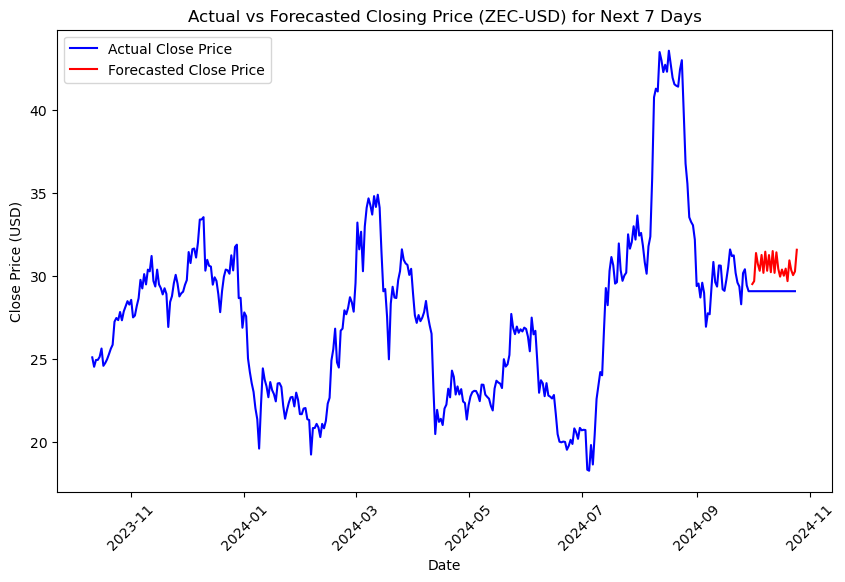

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Actual Close Price', color='blue') 
plt.plot(forecast_dates, predictions, label='Forecasted Close Price', color='red')
plt.xticks(rotation=45)# Plot actual data  # Plot forecasted data
plt.title('Actual vs Forecasted Closing Price (ZEC-USD) for Next 7 Days')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()